In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import sep as sep
import seaborn as sns

In [2]:
exp_path = 'Y:\Lior&Einav\Experiments\experiment11_140720'

In [3]:
T = pd.read_csv(exp_path+sep+'trophallaxis_table_enriched_temp.csv')
T.head()

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant2_got__red,ant2_got_yellow,ant1_crop_before__red,ant1_crop_before_yellow,ant2_crop_before__red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y
0,0,1,1.0,82,170,1,2,1,2,2955.439978,...,5397.756970,1069.492395,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
1,1,1,29.0,392,76,116,159,116,159,1542.859277,...,0.000000,-320029.087952,0.000000,0.000000,0.0,377406.701172,2908.261422,1729.050217,3155.648010,1833.521815
2,2,1,35.0,82,169,195,197,195,197,-149.358057,...,12627.693945,4694.043713,2955.439978,2304.488525,0.0,0.000000,768.371633,2674.638064,NaN,NaN
3,3,1,44.0,169,529,240,243,240,243,1743.842554,...,4294.202209,2896.258789,12627.693945,4694.043713,0.0,0.000000,1277.737512,620.124326,1055.534043,676.616630
4,4,1,48.0,76,148,276,281,276,281,49980.534375,...,1696.540088,42296.675000,330970.803125,57377.613220,0.0,324437.150000,2554.004447,1205.929948,2301.130591,1053.142127


In [4]:
conversion_factors = pd.read_csv(exp_path +sep+ 'conversion_factors_by_weight_and_feeding_sum.csv')
conversion_factors

,red,yellow
0,71526.23311,58617.44098


In [5]:
T.loc[:,'ant1_got_red_ul'] = T.ant1_got__red/conversion_factors.red[0]
T.loc[:,'ant1_got_yellow_ul'] = T.ant1_got_yellow/conversion_factors.yellow[0]
T.loc[:,'ant2_got_red_ul'] = T.ant2_got__red/conversion_factors.red[0]
T.loc[:,'ant2_got_yellow_ul'] = T.ant2_got_yellow/conversion_factors.yellow[0]
T.head()

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant2_crop_before__red,ant2_crop_before_yellow,ant1_x,ant1_y,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul
0,0,1,1.0,82,170,1,2,1,2,2955.439978,...,0.0,0.000000,NaN,NaN,NaN,NaN,0.041320,0.039314,0.075465,0.018245
1,1,1,29.0,392,76,116,159,116,159,1542.859277,...,0.0,377406.701172,2908.261422,1729.050217,3155.648010,1833.521815,0.021571,2.076616,0.000000,-5.459622
2,2,1,35.0,82,169,195,197,195,197,-149.358057,...,0.0,0.000000,768.371633,2674.638064,NaN,NaN,-0.002088,-0.017823,0.176546,0.080079
3,3,1,44.0,169,529,240,243,240,243,1743.842554,...,0.0,0.000000,1277.737512,620.124326,1055.534043,676.616630,0.024380,0.052722,0.060037,0.049410
4,4,1,48.0,76,148,276,281,276,281,49980.534375,...,0.0,324437.150000,2554.004447,1205.929948,2301.130591,1053.142127,0.698772,0.084079,0.023719,0.721572


Text(0, 0.5, 'counts')

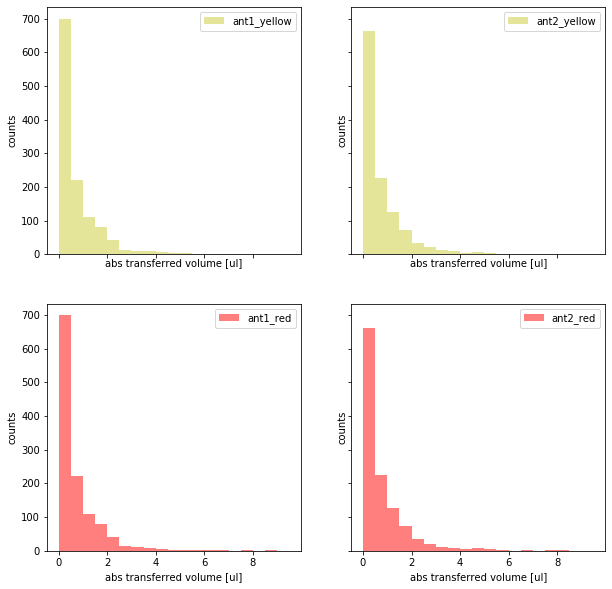

In [6]:
fig, axs = plt.subplots(2,2,figsize=[10,10],sharex=True,sharey=True)
axs[0,0].hist(T.ant1_got_red_ul.abs(),bins=np.arange(0,10,0.5),color='y',label='ant1_yellow',alpha=0.4)
axs[0,0].legend()
axs[0,0].set_xlabel('abs transferred volume [ul]')
axs[0,0].set_ylabel('counts')
axs[0,1].hist(T.ant2_got_red_ul.abs(),bins=np.arange(0,10,0.5),color='y',label='ant2_yellow',alpha=0.4)
axs[0,1].legend()
axs[0,1].set_xlabel('abs transferred volume [ul]')
axs[0,1].set_ylabel('counts')
axs[1,0].hist(T.ant1_got_red_ul.abs(),bins=np.arange(0,10,0.5),color='r',label='ant1_red',alpha=0.5)
axs[1,0].legend()
axs[1,0].set_xlabel('abs transferred volume [ul]')
axs[1,0].set_ylabel('counts')
axs[1,1].hist(T.ant2_got_red_ul.abs(),bins=np.arange(0,10,0.5),color='r',label='ant2_red',alpha=0.5)
axs[1,1].legend()
axs[1,1].set_xlabel('abs transferred volume [ul]')
axs[1,1].set_ylabel('counts')

In [7]:
T.loc[:,'ant1_crop_before_red_ul'] = T.ant1_crop_before__red/conversion_factors.red[0]
T.loc[:,'ant1_crop_before_yellow_ul'] = T.ant1_crop_before_yellow/conversion_factors.yellow[0]
T.loc[:,'ant2_crop_before_red_ul'] = T.ant2_crop_before__red/conversion_factors.red[0]
T.loc[:,'ant2_crop_before_yellow_ul'] = T.ant2_crop_before_yellow/conversion_factors.yellow[0]
T.head()

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant2_x,ant2_y,ant1_got_red_ul,ant1_got_yellow_ul,ant2_got_red_ul,ant2_got_yellow_ul,ant1_crop_before_red_ul,ant1_crop_before_yellow_ul,ant2_crop_before_red_ul,ant2_crop_before_yellow_ul
0,0,1,1.0,82,170,1,2,1,2,2955.439978,...,NaN,NaN,0.041320,0.039314,0.075465,0.018245,0.000000,0.000000,0.0,0.000000
1,1,1,29.0,392,76,116,159,116,159,1542.859277,...,3155.648010,1833.521815,0.021571,2.076616,0.000000,-5.459622,0.000000,0.000000,0.0,6.438471
2,2,1,35.0,82,169,195,197,195,197,-149.358057,...,NaN,NaN,-0.002088,-0.017823,0.176546,0.080079,0.041320,0.039314,0.0,0.000000
3,3,1,44.0,169,529,240,243,240,243,1743.842554,...,1055.534043,676.616630,0.024380,0.052722,0.060037,0.049410,0.176546,0.080079,0.0,0.000000
4,4,1,48.0,76,148,276,281,276,281,49980.534375,...,2301.130591,1053.142127,0.698772,0.084079,0.023719,0.721572,4.627265,0.978849,0.0,5.534823


In [9]:
T.loc[:,'ant1_tot_crop_before_ul'] = T.ant1_crop_before_red_ul+T.ant1_crop_before_yellow_ul
T.loc[:,'ant2_tot_crop_before_ul'] = T.ant2_crop_before_red_ul+T.ant2_crop_before_yellow_ul

In [14]:
max_capacity = max(T.ant1_tot_crop_before_ul.max(), T.ant2_tot_crop_before_ul.max())
max_capacity

18.750274153851677

In [20]:
columns_to_normalize = ['tot_crop_before', 'crop_before_red', 'crop_before_yellow', 'got_red', 'got_yellow']
ants = ['ant1','ant2']
for ant in ants:
    for column_name in columns_to_normalize:
        T.loc[:,ant+'_'+column_name+'_norm'] = T.loc[:,ant+'_'+column_name+'_ul']/max_capacity
T.head()

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant1_tot_crop_before_norm,ant1_crop_before_red_norm,ant1_crop_before_yellow_norm,ant1_got_red_norm,ant1_got_yellow_norm,ant2_tot_crop_before_norm,ant2_crop_before_red_norm,ant2_crop_before_yellow_norm,ant2_got_red_norm,ant2_got_yellow_norm
0,0,1,1.0,82,170,1,2,1,2,2955.439978,...,0.000000,0.000000,0.000000,0.002204,0.002097,0.000000,0.0,0.000000,0.004025,0.000973
1,1,1,29.0,392,76,116,159,116,159,1542.859277,...,0.000000,0.000000,0.000000,0.001150,0.110751,0.343380,0.0,0.343380,0.000000,-0.291176
2,2,1,35.0,82,169,195,197,195,197,-149.358057,...,0.004300,0.002204,0.002097,-0.000111,-0.000951,0.000000,0.0,0.000000,0.009416,0.004271
3,3,1,44.0,169,529,240,243,240,243,1743.842554,...,0.013687,0.009416,0.004271,0.001300,0.002812,0.000000,0.0,0.000000,0.003202,0.002635
4,4,1,48.0,76,148,276,281,276,281,49980.534375,...,0.298988,0.246784,0.052205,0.037267,0.004484,0.295186,0.0,0.295186,0.001265,0.038483


In [22]:
for ant in ants:
    T.loc[:,ant+'_tot_empty_crop_before'] = 1-T.loc[:,ant+"_tot_crop_before_norm"]
T.head()

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant1_crop_before_yellow_norm,ant1_got_red_norm,ant1_got_yellow_norm,ant2_tot_crop_before_norm,ant2_crop_before_red_norm,ant2_crop_before_yellow_norm,ant2_got_red_norm,ant2_got_yellow_norm,ant1_tot_empty_crop_before,ant2_tot_empty_crop_before
0,0,1,1.0,82,170,1,2,1,2,2955.439978,...,0.000000,0.002204,0.002097,0.000000,0.0,0.000000,0.004025,0.000973,1.000000,1.000000
1,1,1,29.0,392,76,116,159,116,159,1542.859277,...,0.000000,0.001150,0.110751,0.343380,0.0,0.343380,0.000000,-0.291176,1.000000,0.656620
2,2,1,35.0,82,169,195,197,195,197,-149.358057,...,0.002097,-0.000111,-0.000951,0.000000,0.0,0.000000,0.009416,0.004271,0.995700,1.000000
3,3,1,44.0,169,529,240,243,240,243,1743.842554,...,0.004271,0.001300,0.002812,0.000000,0.0,0.000000,0.003202,0.002635,0.986313,1.000000
4,4,1,48.0,76,148,276,281,276,281,49980.534375,...,0.052205,0.037267,0.004484,0.295186,0.0,0.295186,0.001265,0.038483,0.701012,0.704814


## Find giver

In [26]:
min_trans_ul = 0.1

In [96]:
ant1_giver = ((T.ant1_got_red_ul < - min_trans_ul) & (T.ant1_got_yellow_ul < min_trans_ul)) | ((T.ant1_got_yellow_ul < - min_trans_ul) & (T.ant1_got_red_ul < min_trans_ul))
np.mean(ant1_giver)

0.4107883817427386

In [97]:
ant1_receiver = ((T.ant1_got_red_ul > min_trans_ul) & (T.ant1_got_yellow_ul > -min_trans_ul)) | ((T.ant1_got_yellow_ul > min_trans_ul) & (T.ant1_got_red_ul > -min_trans_ul))
np.mean(ant1_receiver)

0.36016597510373444

In [98]:
ant2_giver = ((T.ant2_got_red_ul < - min_trans_ul) & (T.ant2_got_yellow_ul < min_trans_ul)) | ((T.ant2_got_yellow_ul < - min_trans_ul) & (T.ant2_got_red_ul < min_trans_ul))
np.mean(ant2_giver)

0.34771784232365144

In [99]:
ant2_receiver = ((T.ant2_got_red_ul > min_trans_ul) & (T.ant2_got_yellow_ul > -min_trans_ul)) | ((T.ant2_got_yellow_ul > min_trans_ul) & (T.ant2_got_red_ul > -min_trans_ul))
np.mean(ant2_receiver)

0.42738589211618255

In [100]:
np.mean(ant1_giver & ant2_giver)

0.09211618257261411

In [101]:
np.mean(ant1_receiver & ant2_receiver)

0.1004149377593361

In [102]:
np.mean((ant1_giver & ~ant2_giver)|(ant2_giver & ~ant1_giver))

0.5742738589211618

In [103]:
np.mean((~ant1_giver & ~ant1_receiver )&(~ant2_receiver & ~ ant2_giver))

0.05062240663900415

In [104]:
ants_list = pd.read_csv(r'Y:\Lior&Einav\Experiments\experiment11_140720\ants_list.csv')
ants_list.head()

,ant_id,is_forager
0,1,False
1,1069,False
2,1125,False
3,1152,False
4,139,False


In [105]:
foragers = ants_list.ant_id[ants_list.is_forager]
foragers

5     150
7     170
9     180
17    233
21    289
31    392
33    421
35    445
41    540
43     61
44     66
48    113
49    148
51     82
52     76
Name: ant_id, dtype: int64

In [106]:
foragers_interactions = T.loc[np.isin(T.actual_ant1,foragers)|np.isin(T.actual_ant2,foragers)]
foragers_interactions.head()

,Unnamed: 0,vidnum,id,actual_ant1,actual_ant2,actual_start,actual_end,general_start_frame,general_end_frame,ant1_got__red,...,ant1_crop_before_yellow_norm,ant1_got_red_norm,ant1_got_yellow_norm,ant2_tot_crop_before_norm,ant2_crop_before_red_norm,ant2_crop_before_yellow_norm,ant2_got_red_norm,ant2_got_yellow_norm,ant1_tot_empty_crop_before,ant2_tot_empty_crop_before
0,0,1,1.0,82,170,1,2,1,2,2955.439978,...,0.000000,0.002204,0.002097,0.000000,0.000000,0.000000,0.004025,0.000973,1.000000,1.000000
1,1,1,29.0,392,76,116,159,116,159,1542.859277,...,0.000000,0.001150,0.110751,0.343380,0.000000,0.343380,0.000000,-0.291176,1.000000,0.656620
2,2,1,35.0,82,169,195,197,195,197,-149.358057,...,0.002097,-0.000111,-0.000951,0.000000,0.000000,0.000000,0.009416,0.004271,0.995700,1.000000
4,4,1,48.0,76,148,276,281,276,281,49980.534375,...,0.052205,0.037267,0.004484,0.295186,0.000000,0.295186,0.001265,0.038483,0.701012,0.704814
5,5,1,49.0,180,148,288,439,288,439,0.000000,...,0.000000,0.000000,0.091629,0.334934,0.001265,0.333669,-0.001265,-0.305802,1.000000,0.665066


In [107]:
T.shape

(1205, 43)

In [108]:
foragers_interactions.shape

(747, 43)